In [1]:
import numpy as np
import pandas as pd 

In [2]:
wine=pd.read_csv("C:/Users/user/Desktop/Machine_learning/winemag-data-130k-v2.csv")

In [3]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

In [10]:
import sys
!{sys.executable} -m pip install wordcloud

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
from wordcloud import WordCloud, STOPWORDS

In [5]:
# Take a look at the decriprtion of the #1 wine before any clean up. 

# IMPORTANT NOTE! I do know some basis of what to do with cleaning the text. My experience in text processing is not that big and
# I did it in RStudio. Thus I DID USE code, that was posted on kaggle (https://www.kaggle.com/akatsuki06/basic-text-processing-cleaning-the-description)

wine['description'][1]

"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016."

In [6]:
# First, I removed all the signs of punctuation and numbers from the text

import re
description =  re.sub('[^a-zA-Z]',' ',wine['description'][1])
description

'This is ripe and fruity  a wine that is smooth while still structured  Firm tannins are filled out with juicy red berry fruits and freshened with acidity  It s  already drinkable  although it will certainly be better from      '

In [7]:
# 

description = description.lower()

description

'this is ripe and fruity  a wine that is smooth while still structured  firm tannins are filled out with juicy red berry fruits and freshened with acidity  it s  already drinkable  although it will certainly be better from      '

In [8]:
#convert string to a list of words
description_words = description.split() 
#iterate over each word and include it if it is not stopword 
description_words = [word for word in description_words if not word in stopwords.words('english')]

description_words

['ripe',
 'fruity',
 'wine',
 'smooth',
 'still',
 'structured',
 'firm',
 'tannins',
 'filled',
 'juicy',
 'red',
 'berry',
 'fruits',
 'freshened',
 'acidity',
 'already',
 'drinkable',
 'although',
 'certainly',
 'better']

In [9]:
ps = PorterStemmer()
description_words=[ps.stem(word) for word in description_words]
description_words

['ripe',
 'fruiti',
 'wine',
 'smooth',
 'still',
 'structur',
 'firm',
 'tannin',
 'fill',
 'juici',
 'red',
 'berri',
 'fruit',
 'freshen',
 'acid',
 'alreadi',
 'drinkabl',
 'although',
 'certainli',
 'better']

In [10]:
wine['description'][0]=' '.join(description_words)
wine['description'][0]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


'ripe fruiti wine smooth still structur firm tannin fill juici red berri fruit freshen acid alreadi drinkabl although certainli better'

In [11]:
stopword_list = stopwords.words('english')
ps = PorterStemmer()
for i in range(1,len(wine['description'])):
    description = re.sub('[^a-zA-Z]',' ',wine['description'][i])
    description = description.lower()
    description_words = description.split()
    description_words = [word for word in description_words if not word in stopword_list]
    description_words = [ps.stem(word) for word in description_words]
    wine['description'][i] = ' '.join(description_words)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
wine['description']

0         ripe fruiti wine smooth still structur firm ta...
1         ripe fruiti wine smooth still structur firm ta...
2         tart snappi flavor lime flesh rind domin green...
3         pineappl rind lemon pith orang blossom start a...
4         much like regular bottl come across rather rou...
5         blackberri raspberri aroma show typic navarran...
6         bright inform red open aroma candi berri white...
7         dri restrain wine offer spice profus balanc ac...
8         savori dri thyme note accent sunnier flavor pr...
9         great depth flavor fresh appl pear fruit touch...
10        soft suppl plum envelop oaki structur cabernet...
11        dri wine spici tight taut textur strongli mine...
12        slightli reduc wine offer chalki tannic backbo...
13        domin oak oak driven aroma includ roast coffe ...
14        build year six gener winemak tradit wineri tre...
15        zesti orang peel appl note abound sprightli mi...
16        bake plum molass balsam vinega

In [37]:
from PIL import Image
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

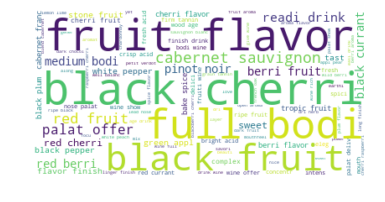

In [42]:
# I created a word cloud from the description column to see, which words are mostly used in the reviews. 
# It gives a good view of most frequent words. 
# I did also see on the internet some suggestions to remove words like “drink, wine, flavor”, 
# so I’m going to use this advice to see, what will word cloud show. 



wordcloud = WordCloud(max_words=100, background_color="white").generate(' '.join(wine['description']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

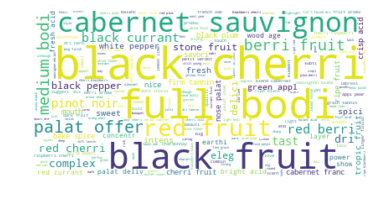

In [45]:
# The image gives an idea of the most frequent words after very obvious “drink”/”flavor”. 
# I thought that word cloud can be useful in understanding of what a typical wine review can consist of.
# Looks like it’s a lot of thing regarding the fruity or berry notes and some other flavors. 
# Maybe if I ever want to write a wine review, this word cloud might help me along the way


wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(wine['description']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()